# Airline Customer Satisfaction - Dissertation
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', category=FutureWarning)
warnings.simplefilter('ignore', category=UserWarning)

train = pd.read_csv('Airline Passenger Satisfaction/train.csv')
test = pd.read_csv('Airline Passenger Satisfaction/test.csv')

C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train.shape

(103904, 25)

In [3]:
train.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
test.shape

(25976, 25)

In [7]:
test.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [8]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [10]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

In [12]:
train.describe()

Age  Flight_Distance  Inflight_wifi_service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival_time_convenient  Ease_of_Online_booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate_location  Food_and_drink  Online_boarding   Seat_comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight_entertainment  On-board_service  Leg_room_service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage_handling  Checkin_service  Inflight_service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes   satisfaction  
count               103904.000000             103594.000000  103904.000000  
mean                    14.815618                 15.178678       0.433333  
std                     38.230901                 38.698682       0.495538  
min                      0.000000                  0.000000       0.000000  
25%                      0.000000                  0.000000       0.000000  
50%                      0.000000                  0.000000       0.000000  
75%                     12.000000                 13.000000       1.000000  
max                   1592.000000               1584.000000       1.000000

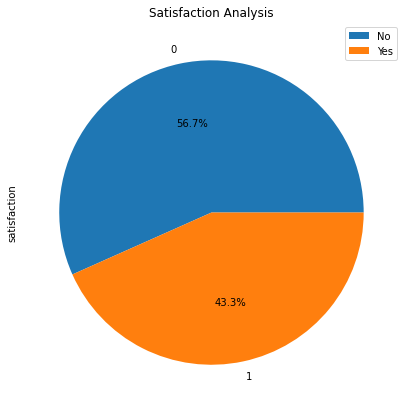

In [13]:
plt.figure(figsize = (7,7))

train['satisfaction'].value_counts().plot(kind = 'pie' ,autopct='%1.1f%%')
plt.legend(labels = ['No', 'Yes'])
plt.title("Satisfaction Analysis")

plt.show()

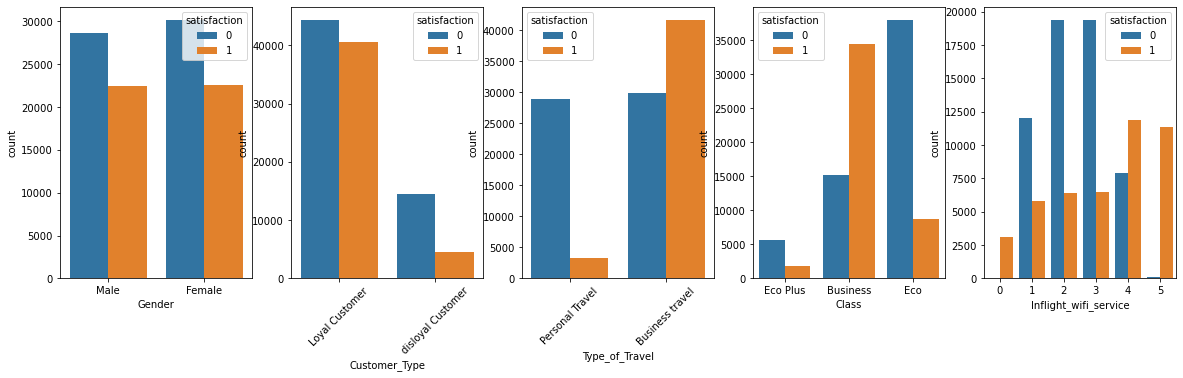

In [14]:
fig, axs=plt.subplots(1,5 , figsize=(20,5)) 

sns.countplot(x="Gender", hue="satisfaction", data=train, ax=axs[0])

x=sns.countplot(x="Customer_Type", hue="satisfaction", data=train, ax=axs[1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x="Type_of_Travel", hue="satisfaction", data=train, ax=axs[2])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

sns.countplot(x="Class", hue="satisfaction", data=train, ax=axs[3])

sns.countplot(x="Inflight_wifi_service", hue="satisfaction", data=train, ax=axs[4])

plt.show()

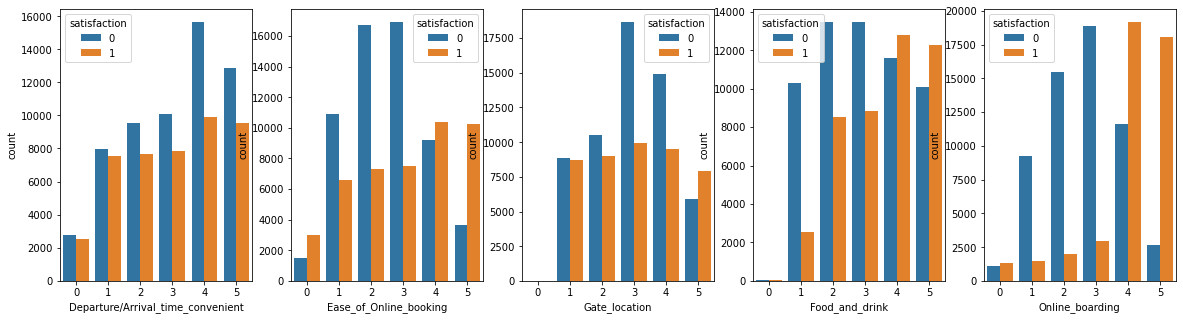

In [15]:
fig, axs=plt.subplots(1,5 , figsize=(20,5)) 

sns.countplot(x="Departure/Arrival_time_convenient", hue="satisfaction", data=train, ax=axs[0])

sns.countplot(x="Ease_of_Online_booking", hue="satisfaction", data=train, ax=axs[1])

sns.countplot(x="Gate_location", hue="satisfaction", data=train, ax=axs[2])

sns.countplot(x="Food_and_drink", hue="satisfaction", data=train, ax=axs[3])

sns.countplot(x="Online_boarding", hue="satisfaction", data=train, ax=axs[4])

plt.show()

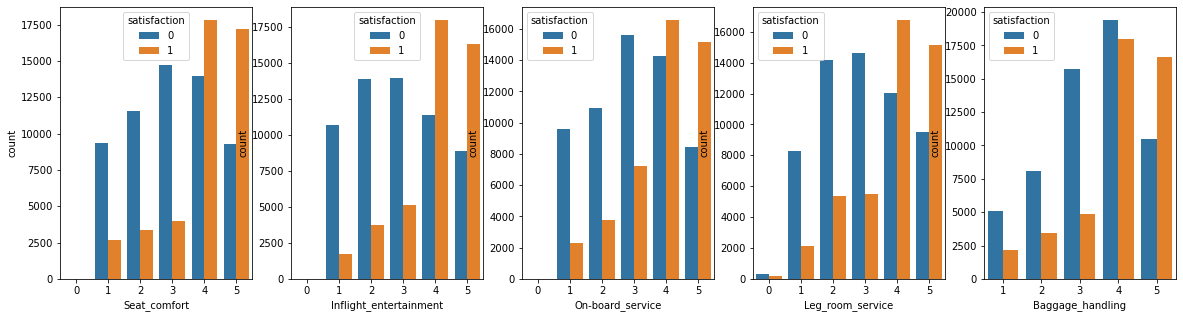

In [16]:
fig, axs=plt.subplots(1,5 , figsize=(20,5)) 

sns.countplot(x="Seat_comfort", hue="satisfaction", data=train, ax=axs[0])

sns.countplot(x="Inflight_entertainment", hue="satisfaction", data=train, ax=axs[1])

sns.countplot(x="On-board_service", hue="satisfaction", data=train, ax=axs[2])

sns.countplot(x="Leg_room_service", hue="satisfaction", data=train, ax=axs[3])

sns.countplot(x="Baggage_handling", hue="satisfaction", data=train, ax=axs[4])

plt.show()

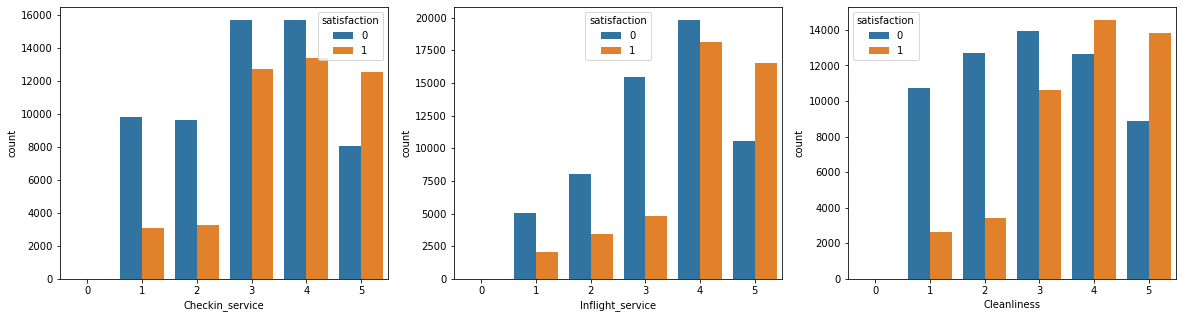

In [17]:
fig, axs=plt.subplots(1,3 , figsize=(20,5)) 

sns.countplot(x="Checkin_service", hue="satisfaction", data=train, ax=axs[0])

sns.countplot(x="Inflight_service", hue="satisfaction", data=train, ax=axs[1])

sns.countplot(x="Cleanliness", hue="satisfaction", data=train, ax=axs[2])

plt.show()

In [18]:
import plotly.express as px

def hist(feature):
    group_train = train.groupby([feature, 'satisfaction']).size().reset_index()
    group_train = group_train.rename(columns={0: 'Count'})
    fig = px.histogram(group_train, x=feature, y='Count', color='satisfaction', 
                       marginal='box', title=f'Satisfaction {feature} distribution')
    fig.show()

In [19]:
hist('Age')
hist('Flight_Distance')
hist('Departure_Delay_in_Minutes')
hist('Arrival_Delay_in_Minutes')

<AxesSubplot:xlabel='Arrival_Delay_in_Minutes', ylabel='Departure_Delay_in_Minutes'>

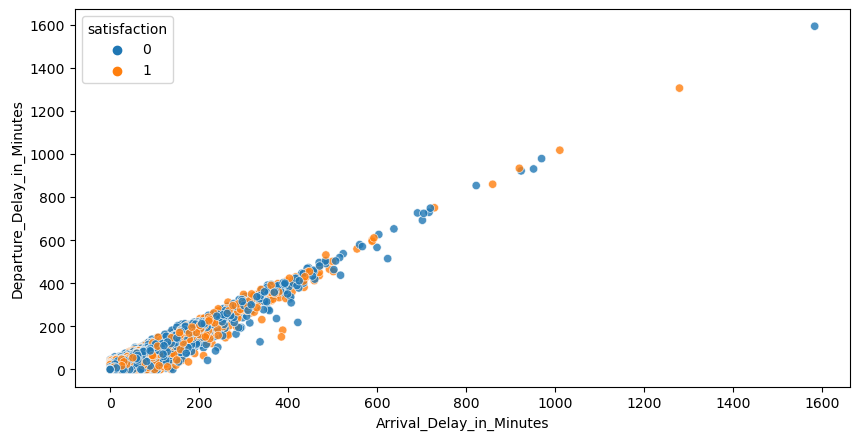

In [20]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train, x='Arrival_Delay_in_Minutes',y='Departure_Delay_in_Minutes',hue='satisfaction', alpha=0.8)

(0.0, 1000.0)

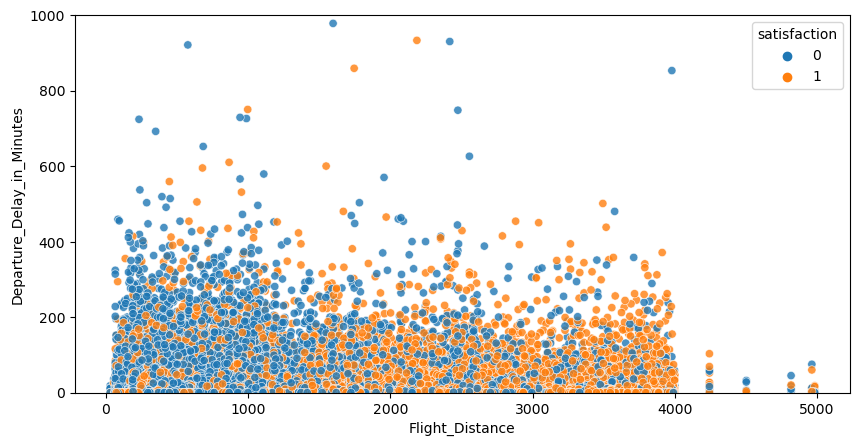

In [21]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train,x='Flight_Distance',y='Departure_Delay_in_Minutes',hue='satisfaction', alpha=0.8)
plt.ylim(0,1000)

In [22]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

Total   Percent
Arrival_Delay_in_Minutes    310  0.002984
satisfaction                  0  0.000000
Food_and_drink                0  0.000000
Customer_Type                 0  0.000000
Age                           0  0.000000

<Figure size 1440x288 with 0 Axes>

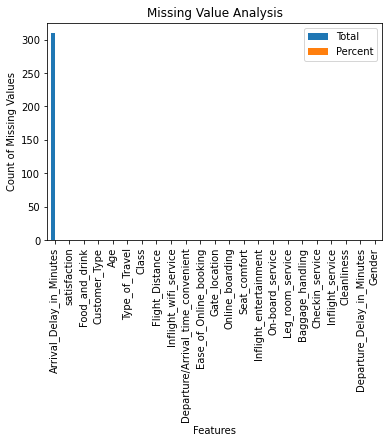

In [23]:
plt.figure(figsize=(20,4))
missing.plot(kind="bar")
plt.title('Missing Value Analysis')
plt.xlabel("Features")
plt.ylabel("Count of Missing Values")
plt.show()

In [24]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

Total   Percent
Arrival_Delay_in_Minutes     83  0.003195
satisfaction                  0  0.000000
Food_and_drink                0  0.000000
Customer_Type                 0  0.000000
Age                           0  0.000000

In [25]:
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [26]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [27]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

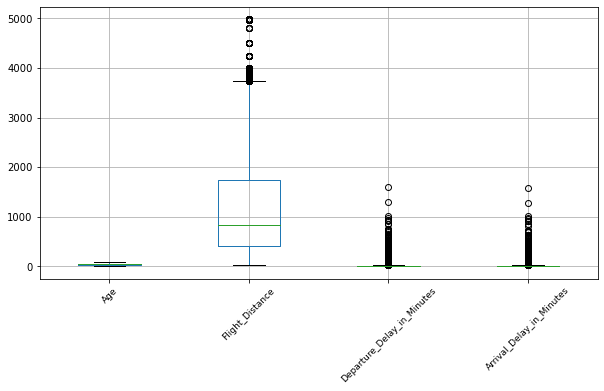

In [28]:
plt.figure(figsize = (10,5))
bplt = train.boxplot(column = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'])
                        
bplt.plot()
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

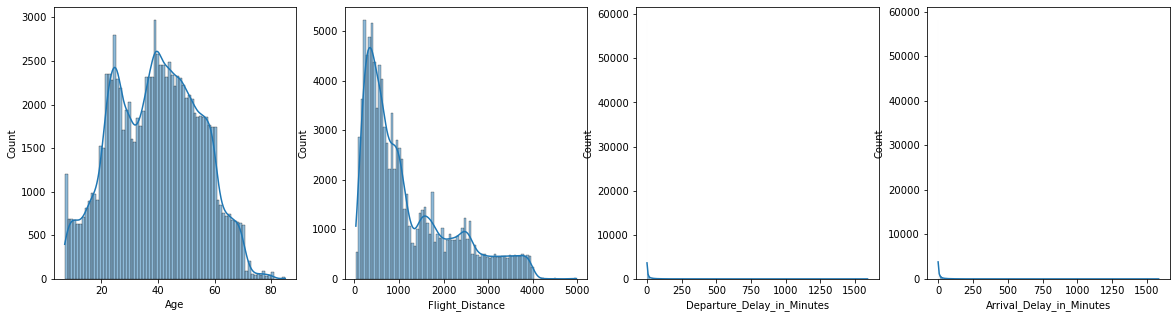

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.histplot(data=train, x="Age", kde=True, ax=axs[0])
sns.histplot(data=train, x="Flight_Distance", kde=True, ax=axs[1])
sns.histplot(data=train, x="Departure_Delay_in_Minutes", kde=True, ax=axs[2])
sns.histplot(data=train, x="Arrival_Delay_in_Minutes", kde=True, ax=axs[3])

plt.show()

In [30]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                    24.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                            1.0
dtype: float64


In [31]:
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(74931, 23)

<AxesSubplot:>

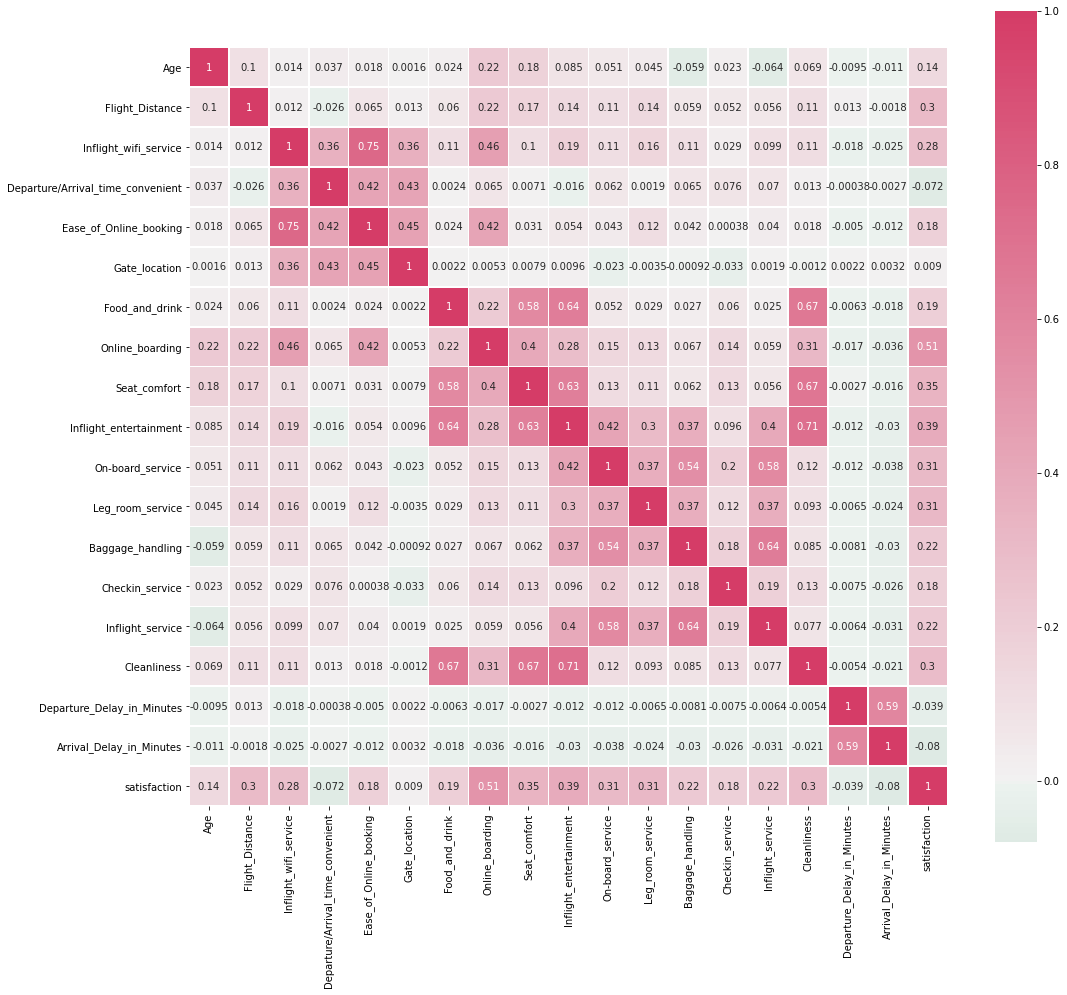

In [32]:
f, ax = plt.subplots(figsize=(17, 17))
import seaborn as sns
corr_mat = train.corr()

cmap = sns.diverging_palette(150, 1, as_cmap=True)

sns.heatmap(corr_mat, square = True, cmap = cmap, annot =True, vmax=None, center=0, linewidths=.5, cbar_kws={"shrink": .9})

In [33]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [34]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

In [35]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

Gender  Customer_Type       Age  Type_of_Travel  Class  Flight_Distance  \
0     1.0            0.0  0.076923             1.0    1.0         0.115789   
1     0.0            0.0  0.243590             0.0    0.0         0.299865   
2     1.0            0.0  0.692308             0.0    0.0         0.049393   
3     0.0            0.0  0.243590             1.0    0.5         0.310121   
4     1.0            0.0  0.512821             1.0    0.5         0.336032   

   Inflight_wifi_service  Departure/Arrival_time_convenient  \
0                    0.6                                0.8   
1                    0.4                                0.4   
2                    0.6                                0.6   
3                    0.6                                0.8   
4                    0.4                                0.8   

   Ease_of_Online_booking  Gate_location  ...  Inflight_entertainment  \
0                     0.6            0.2  ...                     1.0   
1                     0.4            0.4  ...                     1.0   
2                     0.6            0.6  ...                     0.6   
3                     0.4            0.2  ...                     0.2   
4                     0.4            0.6  ...                     0.4   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0               0.8               0.6              0.75         0.666667   
1               0.8               0.6              0.75         0.666667   
2               0.6               0.8              0.75         0.333333   
3               0.6               0.8              0.75         0.666667   
4               0.6               0.6              0.75         0.333333   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0               1.0          1.0                    0.833333   
1               0.8          1.0                    0.000000   
2               0.6          0.6                    0.000000   
3               0.8          0.2                    0.000000   
4               1.0          0.4                    0.300000   

   Arrival_Delay_in_Minutes  satisfaction  
0                   0.56250           0.0  
1                   0.00000           1.0  
2                   0.00000           1.0  
3                   0.00000           0.0  
4                   0.71875           0.0  

[5 rows x 23 columns]

In [36]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer_Type', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00490911 0.0364038  0.03555282 0.11447826 0.08644802 0.04345831
 0.14367334 0.01735736 0.04081363 0.01822321 0.01124443 0.17493786
 0.05068393 0.04890101 0.02885013 0.04013671 0.02192046 0.01846239
 0.02081503 0.0242919  0.00853594 0.00990233]


In [38]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [39]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state=1, stratify= y)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
import time
t0=time.time()

model = LogisticRegression(solver='liblinear', penalty='l2')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [42]:
print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[ 4.85993284e-02 -2.23234464e+00 -1.01523236e-02 -2.93302803e+00
  -5.85319319e-01 -7.62449057e-06  4.39501245e-01 -1.23958278e-01
  -1.92603023e-01  2.49779259e-02 -6.82595789e-02  6.21849286e-01
   9.68764345e-02 -2.66418381e-02  2.98711761e-01  2.57853596e-01
   1.35259081e-01  3.58283446e-01  1.24135266e-01  2.70537029e-01
   1.58873720e-03 -3.98178024e-02]]
Bias : [-5.56168014]


In [43]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tt_lr = time.time()-t0
print("Time taken = {}".format(tt_lr))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))

Time taken = 1.0342676639556885
Test Accuracy:  0.8762927870821379
Test F1 Score:  0.864868804664723
Test Precision Score:  0.881051381051381
Test Recall Score: 0.8492699685084455


In [44]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8001
           1       0.88      0.85      0.86      6986

    accuracy                           0.88     14987
   macro avg       0.88      0.87      0.88     14987
weighted avg       0.88      0.88      0.88     14987



Text(70.0, 0.5, 'Truth')

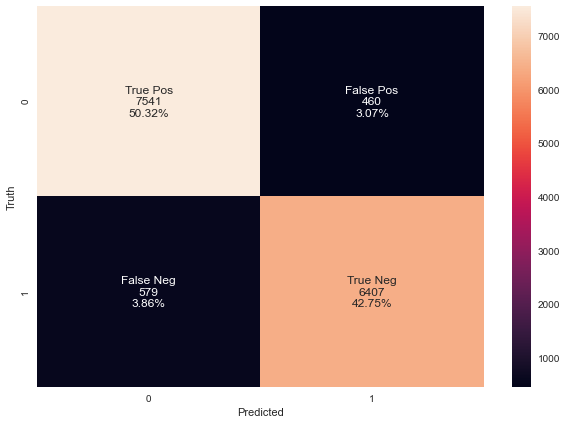

In [69]:
lr1_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in lr1_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in lr1_confusion_matrix.flatten()/np.sum(lr1_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(lr1_confusion_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ROC_AUC:  0.874578741284594


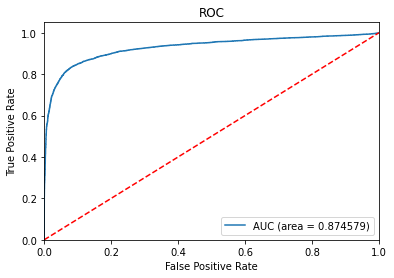

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

model_lr_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print('ROC_AUC: ', model_lr_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_lr_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [47]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.358037
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                59944
Model:                          Logit   Df Residuals:                    59922
Method:                           MLE   Df Model:                           21
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.4817
Time:                        02:04:50   Log-Likelihood:                -21462.
converged:                       True   LL-Null:                       -41412.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Gender                               -0.1298      0.025     -5

Time taken = 0.05502033233642578
Test Accuracy:  0.864616000533796
Test F1 Score:  0.8499815157116452
Test Precision Score:  0.8790334913595351
Test Recall Score: 0.8227884340108789
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      8001
           1       0.88      0.82      0.85      6986

    accuracy                           0.86     14987
   macro avg       0.87      0.86      0.86     14987
weighted avg       0.87      0.86      0.86     14987

ROC_AUC:  0.8619628959205751


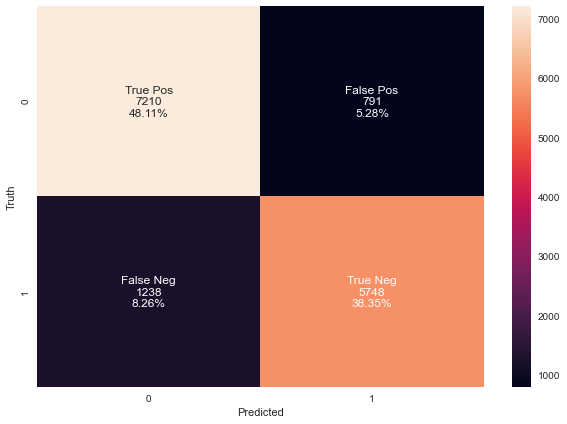

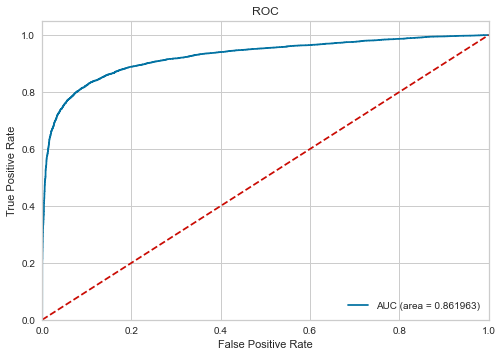

In [80]:
from sklearn.naive_bayes import GaussianNB
import time

t0=time.time()
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

y_pred = model_gnb.predict(X_test)

tt_gb = time.time()-t0
print("Time taken = {}".format(tt_gb))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_gnb_roc_auc = roc_auc_score(y_test, model_gnb.predict(X_test))
print('ROC_AUC: ', model_gnb_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_gnb_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Time taken = 0.685687780380249
Test Accuracy:  0.7485821044905585
Test F1 Score:  0.7041457286432161
Test Precision Score:  0.7798260869565218
Test Recall Score: 0.6418551388491268
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      8001
           1       0.78      0.64      0.70      6986

    accuracy                           0.75     14987
   macro avg       0.75      0.74      0.74     14987
weighted avg       0.75      0.75      0.75     14987

ROC_AUC:  0.7418124588133899


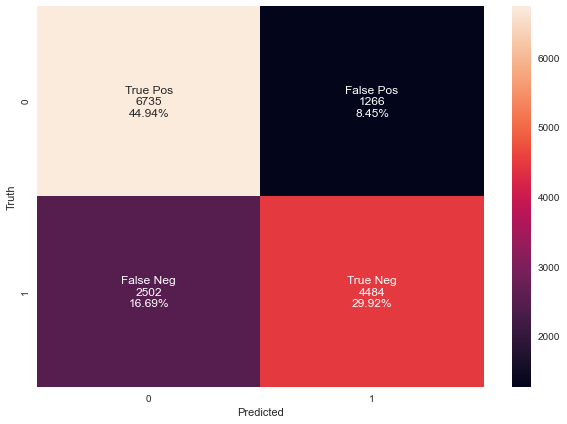

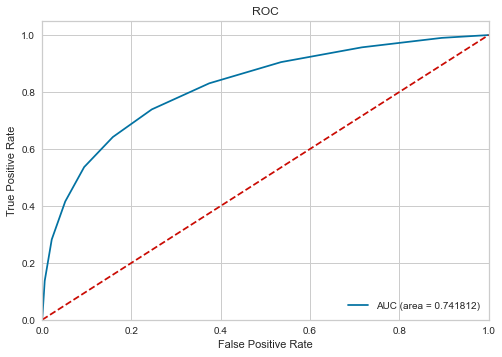

In [96]:
from sklearn.neighbors import KNeighborsClassifier
t0=time.time()

model_knn = KNeighborsClassifier(n_neighbors = 10, algorithm = 'kd_tree', n_jobs = 4)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

tt_knn = time.time()-t0
print("Time taken = {}".format(tt_knn))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_knn_roc_auc = roc_auc_score(y_test, model_knn.predict(X_test))
print('ROC_AUC: ', model_knn_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Time taken = 0.09015822410583496
Test Accuracy:  0.9314739440848736
Test F1 Score:  0.925885833874576
Test Precision Score:  0.9336341143938292
Test Recall Score: 0.9182651016318351
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8001
           1       0.93      0.92      0.93      6986

    accuracy                           0.93     14987
   macro avg       0.93      0.93      0.93     14987
weighted avg       0.93      0.93      0.93     14987

ROC_AUC:  0.9306361128706606


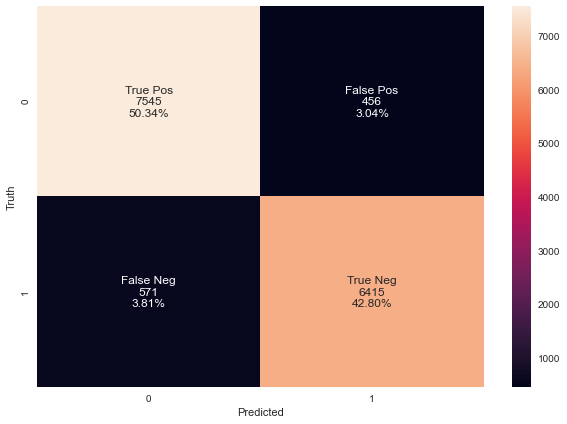

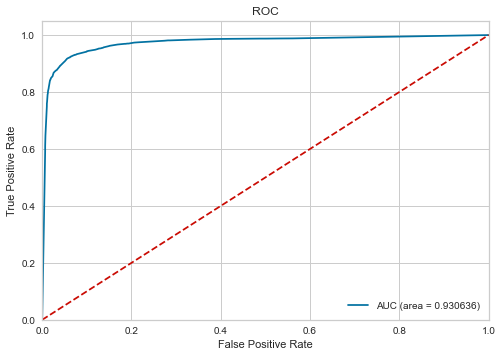

In [135]:
from sklearn.tree import DecisionTreeClassifier

t0=time.time()
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features= 'sqrt')
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

tt_dt = time.time()-t0
print("Time taken = {}".format(tt_dt))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_dt_roc_auc = roc_auc_score(y_test, model_dt.predict(X_test))
print('ROC_AUC: ', model_dt_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_dt_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

[Text(418.5, 475.65000000000003, 'X[11] <= 3.5\nentropy = 0.997\nsamples = 59944\nvalue = [32003, 27941]'),
 Text(209.25, 339.75, 'X[6] <= 0.5\nentropy = 0.624\nsamples = 28625\nvalue = [24171, 4454]'),
 Text(104.625, 203.85000000000002, 'X[11] <= 0.5\nentropy = 0.035\nsamples = 1102\nvalue = [4, 1098]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.0\nsamples = 828\nvalue = [0, 828]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.11\nsamples = 274\nvalue = [4, 270]'),
 Text(313.875, 203.85000000000002, 'X[6] <= 3.5\nentropy = 0.535\nsamples = 27523\nvalue = [24167, 3356]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.354\nsamples = 25015\nvalue = [23341, 1674]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.914\nsamples = 2508\nvalue = [826, 1682]'),
 Text(627.75, 339.75, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 31319\nvalue = [7832, 23487]'),
 Text(523.125, 203.85000000000002, 'X[12] <= 3.5\nentropy = 0.528\nsamples = 24879\nvalue = [2975, 21904]'),
 Text(470.8125, 67.949

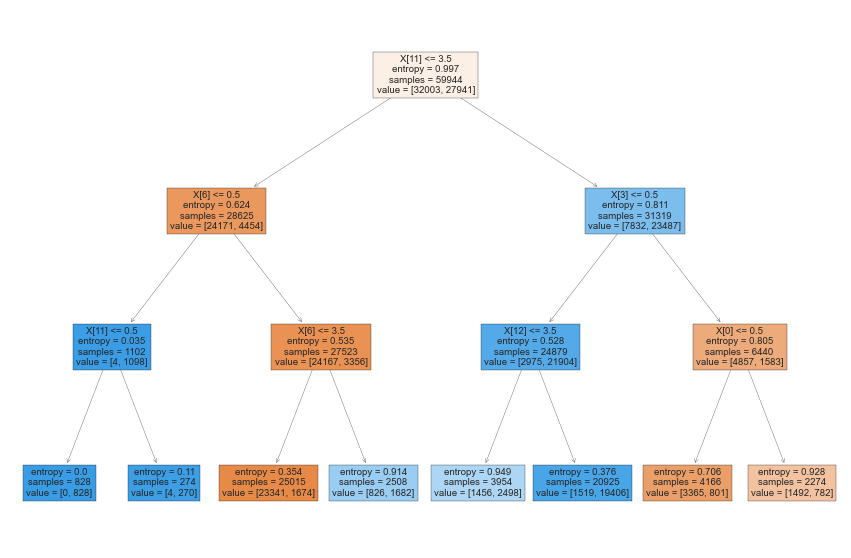

In [105]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_dt, filled=True)

Time taken = 20.855783462524414
Test Accuracy:  0.7339027156869287
Test F1 Score:  0.7225546124947824
Test Precision Score:  0.702896589063346
Test Recall Score: 0.7433438305181792
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      8001
           1       0.70      0.74      0.72      6986

    accuracy                           0.73     14987
   macro avg       0.73      0.73      0.73     14987
weighted avg       0.74      0.73      0.73     14987

ROC_AUC:  0.7345015615533028


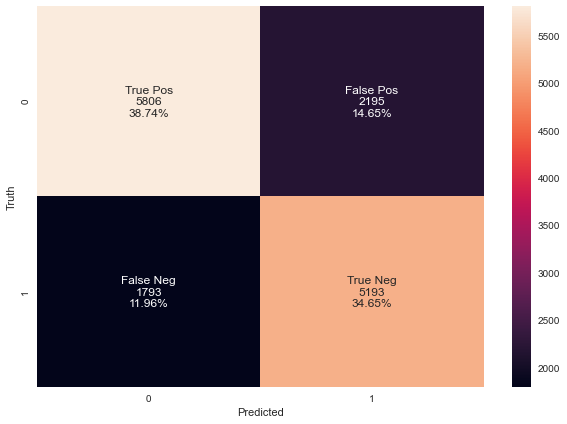

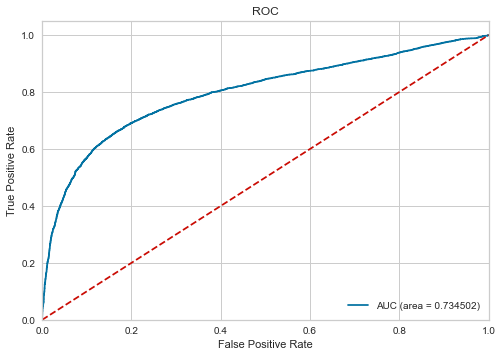

In [129]:
from sklearn.neural_network import MLPClassifier
t0=time.time()

model_mlp = MLPClassifier(hidden_layer_sizes= (30, 30, 30), max_iter=100, activation = 'logistic', 
                          solver='lbfgs', learning_rate_init=0.5)
model_mlp.fit(X_train, y_train)
y_pred = model_mlp.predict(X_test)

tt_mlp = time.time()-t0
print("Time taken = {}".format(tt_mlp))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_mlp_roc_auc = roc_auc_score(y_test, model_mlp.predict(X_test))
print('ROC_AUC: ', model_mlp_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_mlp_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Time taken = 5.186430931091309
Test Accuracy:  0.9572295989857876
Test F1 Score:  0.9534326189611333
Test Precision Score:  0.967989378964449
Test Recall Score: 0.9393071858001718
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8001
           1       0.97      0.94      0.95      6986

    accuracy                           0.96     14987
   macro avg       0.96      0.96      0.96     14987
weighted avg       0.96      0.96      0.96     14987

ROC_AUC:  0.9560927880006983


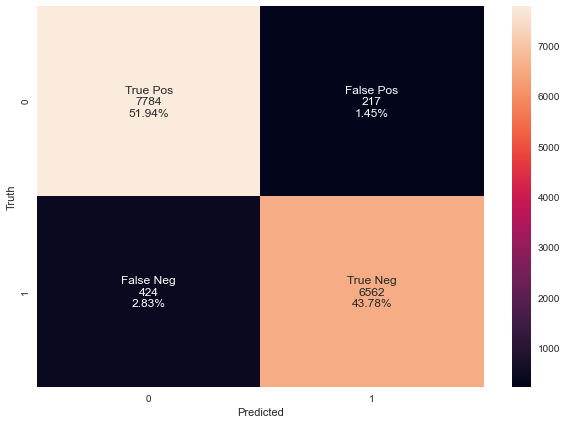

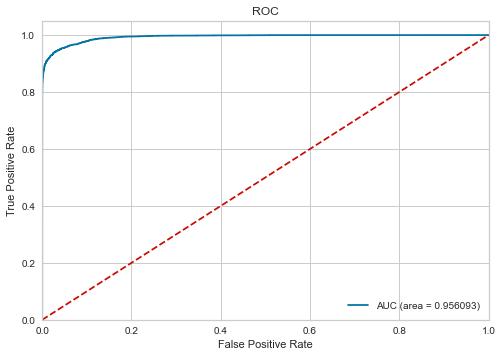

In [112]:
from sklearn.ensemble import RandomForestClassifier

t0=time.time()
model_rf = RandomForestClassifier(max_depth= 16,
             min_samples_leaf= 1,
             min_samples_split = 2,
             n_estimators= 100,
             random_state = 12345)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

tt_rf = time.time()-t0
print("Time taken = {}".format(tt_rf))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
print('ROC_AUC: ', model_rf_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

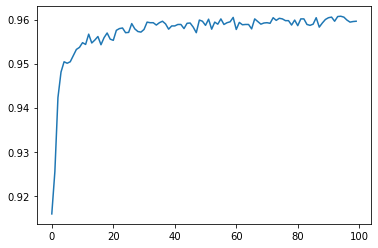

In [55]:
trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_pred)

plt.plot(trees,accuracy)

[04:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken = 1.111231803894043
Test Accuracy:  0.9603656502301995
Test F1 Score:  0.9568690095846644
Test Precision Score:  0.9709696433834365
Test Recall Score: 0.9431720584025193
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8001
           1       0.97      0.94      0.96      6986

    accuracy                           0.96     14987
   macro avg       0.96      0.96      0.96     14987
weighted avg       0.96      0.96      0.96     14987

ROC_AUC:  0.959275068071401


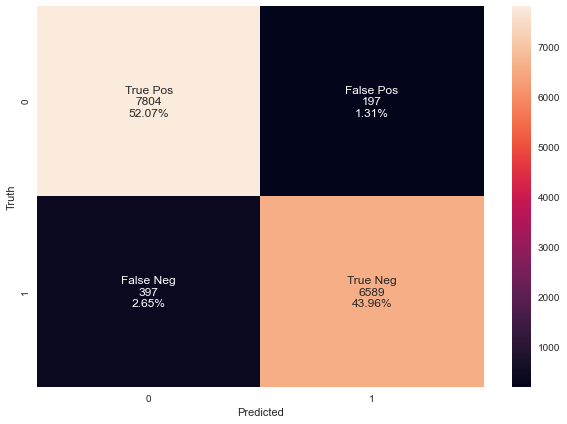

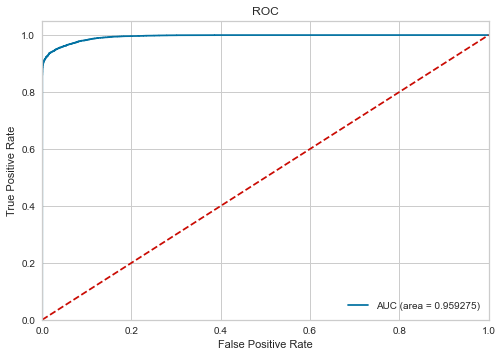

In [116]:
import xgboost as xgb

t0=time.time()
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

tt_xgb = time.time()-t0
print("Time taken = {}".format(tt_xgb))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_xgb_roc_auc = roc_auc_score(y_test, model_xgb.predict(X_test))
print('ROC_AUC: ', model_xgb_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Time taken = 4.502021074295044
Test Accuracy:  0.9306732501501301
Test F1 Score:  0.9249981953367502
Test Precision Score:  0.9330129605358963
Test Recall Score: 0.9171199541941025
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8001
           1       0.93      0.92      0.92      6986

    accuracy                           0.93     14987
   macro avg       0.93      0.93      0.93     14987
weighted avg       0.93      0.93      0.93     14987

ROC_AUC:  0.9298135703978886


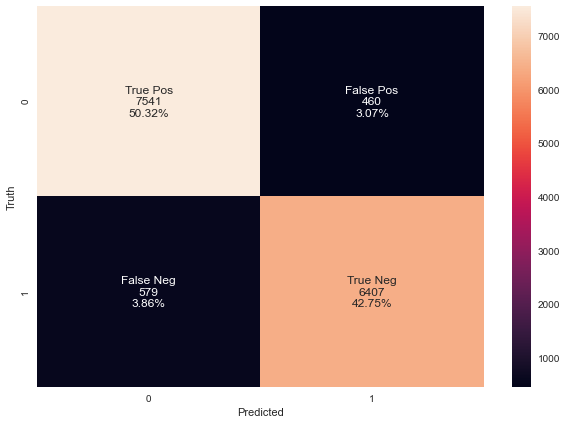

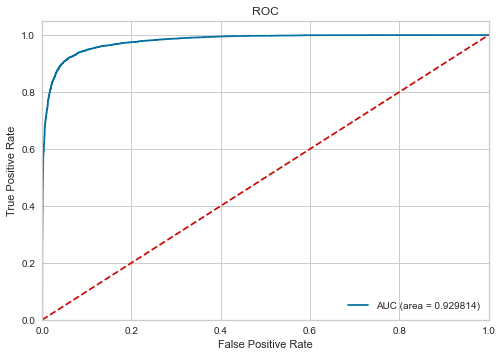

In [121]:
from sklearn.ensemble import AdaBoostClassifier as adab
t0=time.time()

model_adab = adab(n_estimators= 100,
             random_state = 12345)
model_adab.fit(X_train, y_train)
y_pred = model_adab.predict(X_test)

tt_adab = time.time()-t0
print("Time taken = {}".format(tt_adab))
print("Test Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",metrics.f1_score(y_test, y_pred))
print("Test Precision Score: ",metrics.precision_score(y_test, y_pred))
print("Test Recall Score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_adab_roc_auc = roc_auc_score(y_test, model_adab.predict(X_test))
print('ROC_AUC: ', model_adab_roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, model_adab.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.6f)' % model_adab_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

[14:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


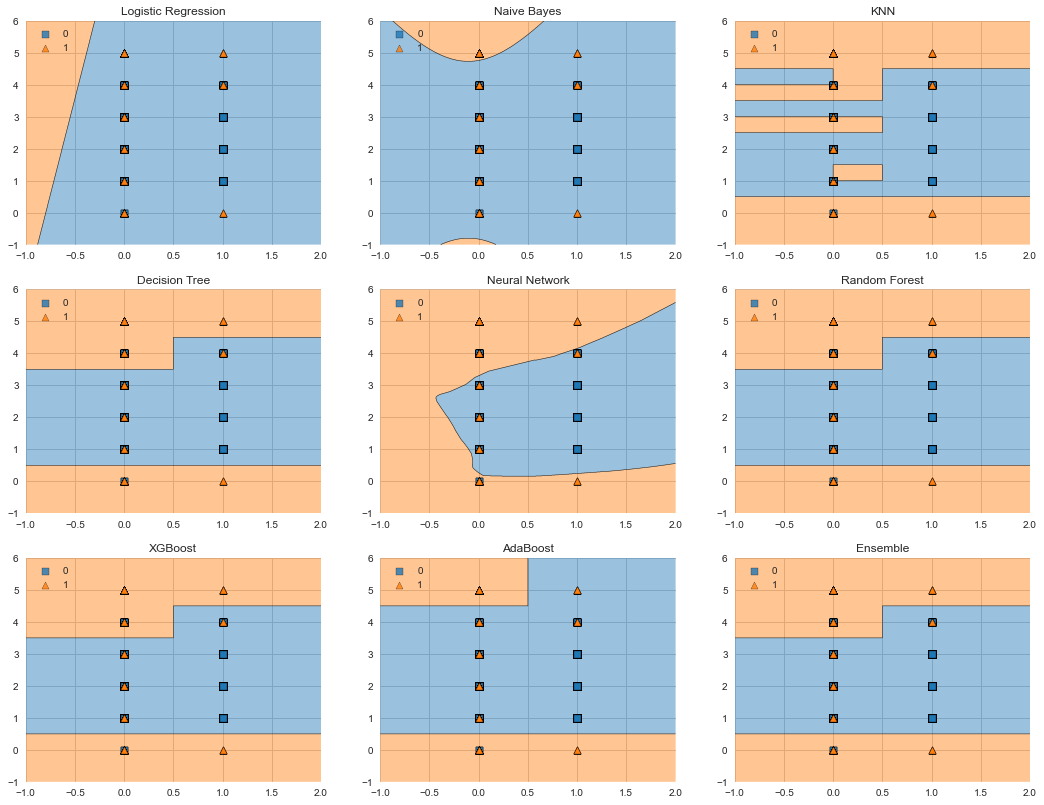

In [139]:
import matplotlib.gridspec as gridspec
import itertools
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]] 
#took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

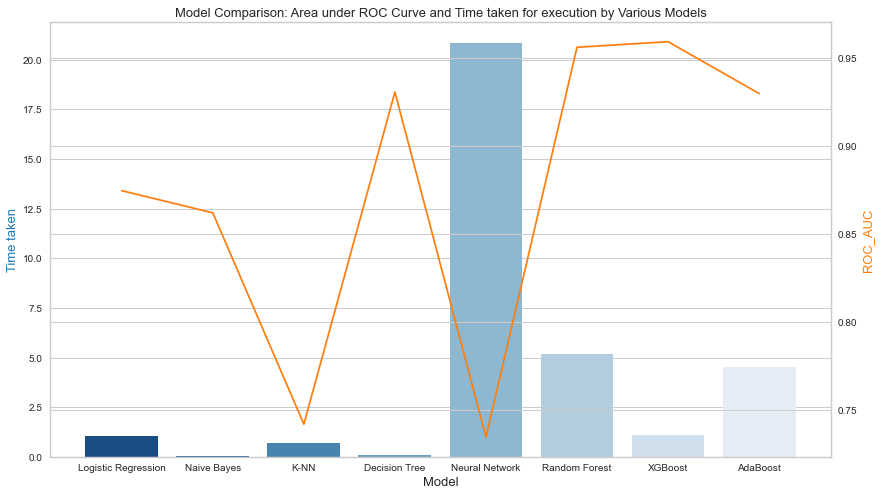

In [136]:
roc_auc_scores = [model_lr_roc_auc, model_gnb_roc_auc, model_knn_roc_auc, model_dt_roc_auc, model_mlp_roc_auc
                  , model_rf_roc_auc, model_xgb_roc_auc, model_adab_roc_auc]
tt = [tt_lr, tt_gb, tt_knn, tt_dt, tt_mlp, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Text(0.5, 1.0, 'Feature Importance')

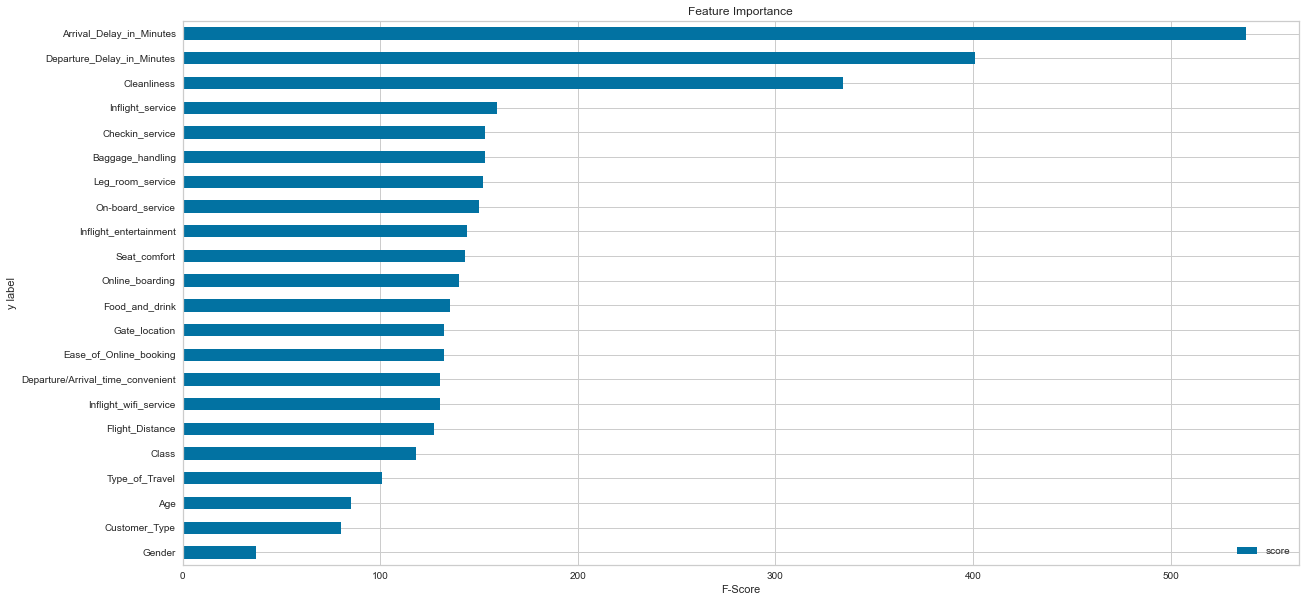

In [137]:
orig_feature_names = X_train.columns
feature_important = model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names); ## plot top features
#ax.set_xlabel("F-Score")
ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')

ValueError: Invalid parameter max_depth for estimator LogisticRegression(solver='liblinear'). Check the list of available parameters with `estimator.get_params().keys()`.

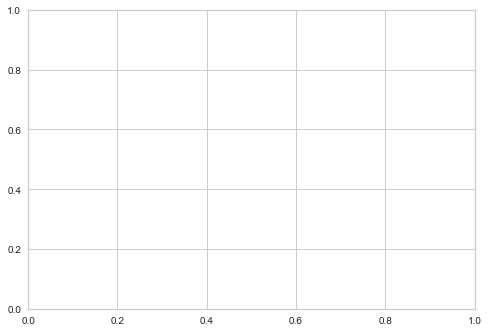

In [70]:
from yellowbrick.model_selection import validation_curve

viz = validation_curve(model, X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1")

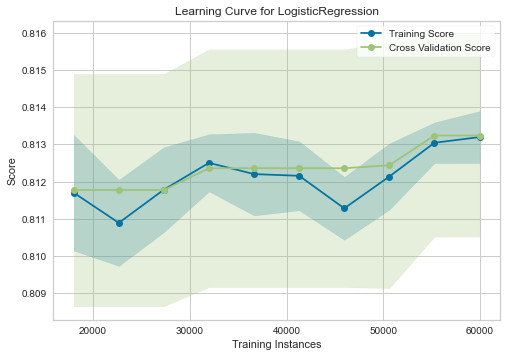

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [79]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

#Create the learning curve visualizer
cv = StratifiedKFold()
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(model, cv=cv, scoring='accuracy', train_sizes=sizes)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show() 

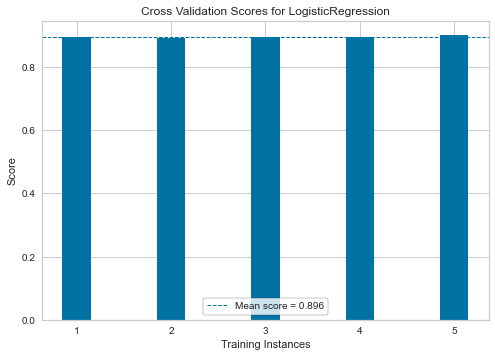

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [78]:
from yellowbrick.model_selection import CVScores

cv = StratifiedKFold()
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        
visualizer.show()   

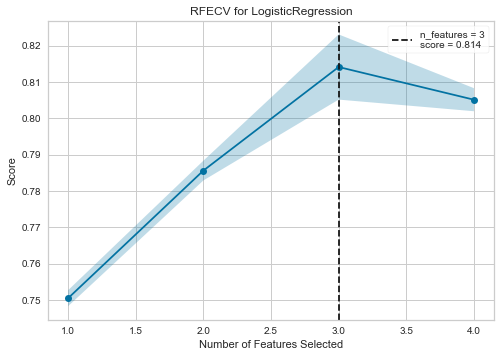

<AxesSubplot:title={'center':'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [75]:
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold()
visualizer = RFECV(model, cv=cv, scoring='f1')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

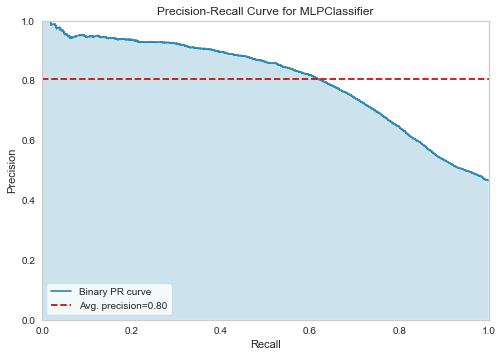

<AxesSubplot:title={'center':'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [130]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(model_mlp)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

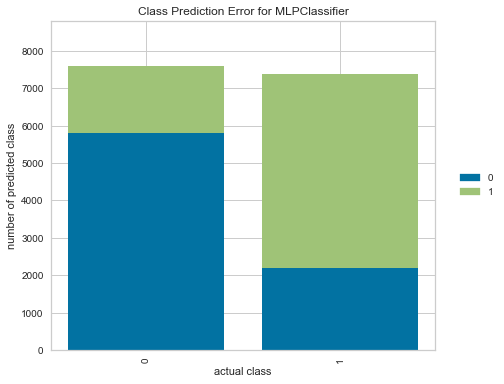

<AxesSubplot:title={'center':'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [131]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model_mlp)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

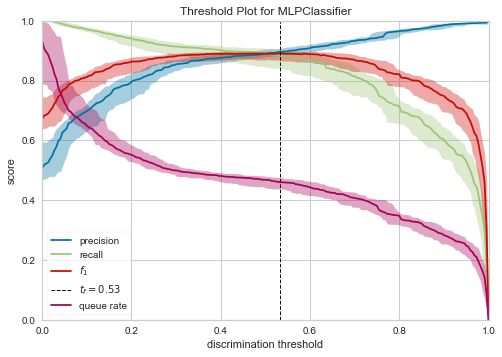

<AxesSubplot:title={'center':'Threshold Plot for MLPClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [133]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
visualizer = DiscriminationThreshold(model_mlp)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

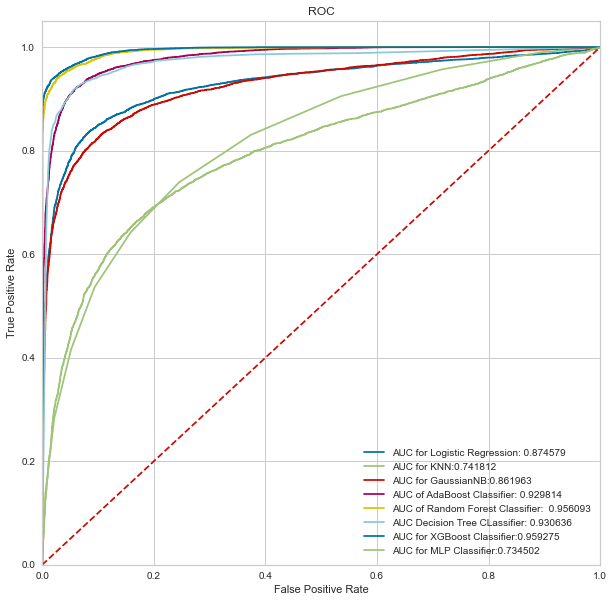

In [138]:
f, ax = plt.subplots(figsize=(10, 10))

model_lr_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC for Logistic Regression: %0.6f' % model_lr_roc_auc)

model_knn_roc_auc = roc_auc_score(y_test, model_knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC for KNN:%0.6f' % model_knn_roc_auc)

model_gnb_roc_auc = roc_auc_score(y_test, model_gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_gnb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC for GaussianNB:%0.6f' % model_gnb_roc_auc)

model_adab_roc_auc = roc_auc_score(y_test, model_adab.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_adab.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC of AdaBoost Classifier: %0.6f' % model_adab_roc_auc)

model_rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC of Random Forest Classifier:  %0.6f' % model_rf_roc_auc)

model_dt_roc_auc = roc_auc_score(y_test, model_dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC Decision Tree CLassifier: %0.6f' % model_dt_roc_auc)

model_xgb_roc_auc = roc_auc_score(y_test, model_xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC for XGBoost Classifier:%0.6f' % model_xgb_roc_auc)

model_mlp_roc_auc = roc_auc_score(y_test, model_mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_mlp.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC for MLP Classifier:%0.6f' % model_mlp_roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()

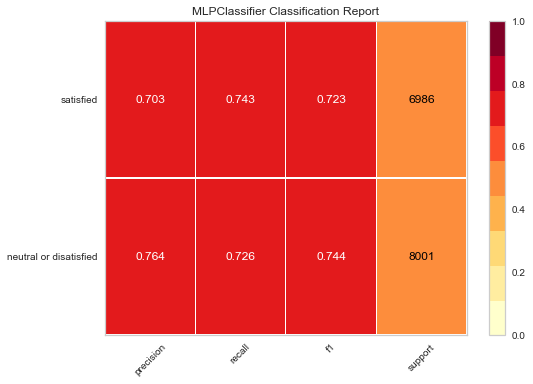

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [132]:
from yellowbrick.classifier import ClassificationReport

classes = ["neutral or disatisfied", "satisfied"]
visualizer = ClassificationReport(model_mlp, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()                       